# Support Vector Machine

This activity demonstrates using support vector machines (SVMs) with various example 2D datasets. 
Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use 
a Gaussian kernel with SVMs.

### Example 1: Linear Kernel

We will begin with a 2D example dataset which can be separated by a
linear boundary. In this dataset, the positions of the positive examples (indicated with +) and the
negative examples (indicated with -) suggest a natural separation indicated
by the gap. However, notice that there is an outlier positive example + on
the far left at about (0,4). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.

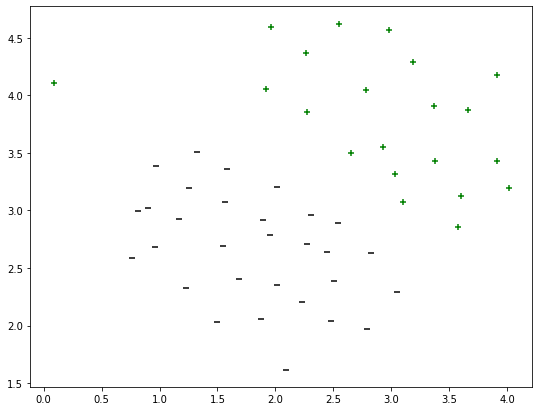

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.markers as markers
import pandas as pd
import numpy as np
from os.path import join
from sklearn.svm import SVC

def LoadData(sfile, lfile):
    # Load samples
    df = pd.read_csv(
        filepath_or_buffer=join('data', sfile), 
        header=None)
    samples = df.iloc[:,:].values

    # Load classification labels
    df = pd.read_csv(
        filepath_or_buffer=join('data', lfile), 
        header=None)
    labels = df.iloc[:,:].values
    
    return samples, labels

def ParseData(samples, labels):

    x1_pos = np.array([])
    x2_pos = np.array([])
    x1_neg = np.array([])
    x2_neg = np.array([])

    for i in range(0, len(labels)):
        if(labels[i][0] == 1):
            x1_pos = np.append(x1_pos,samples[i, 0])
            x2_pos = np.append(x2_pos,samples[i, 1])
        else:
            x1_neg = np.append(x1_neg,samples[i, 0])
            x2_neg = np.append(x2_neg,samples[i, 1])
            
    return x1_pos, x2_pos, x1_neg, x2_neg

samples, labels = LoadData('samples.csv', 'labels.csv')
x1_pos, x2_pos, x1_neg, x2_neg = ParseData(samples, labels)

plt.figure(figsize=(9,7))        
plt.scatter(x1_pos, x2_pos, color='green', marker="+")
plt.scatter(x1_neg, x2_neg, color='black', marker="_")
plt.show()

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def SupportVectorMachine(X, y, kernel, C, sigma):
    if(kernel == 'linear'):
        model = SVC(kernel=kernel, C=C)
    else:
        gamma = 1/(2*sigma*sigma)
        model = SVC(kernel=kernel, C=C, gamma=gamma)
        
    clf = model.fit(X, y.ravel())
    return clf, model

def PlotSVM(clf, X, y):

    fig, ax = plt.subplots(figsize=(9, 7))
    # title for the plots
  
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
    
    x1_pos, x2_pos, x1_neg, x2_neg = ParseData(X, y)
    plt.scatter(x1_pos, x2_pos, color='green', marker="+")
    plt.scatter(x1_neg, x2_neg, color='black', marker="_")
    return fig, ax
    

Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$ where $\lambda$ is the regularization parameter for logistic regression.

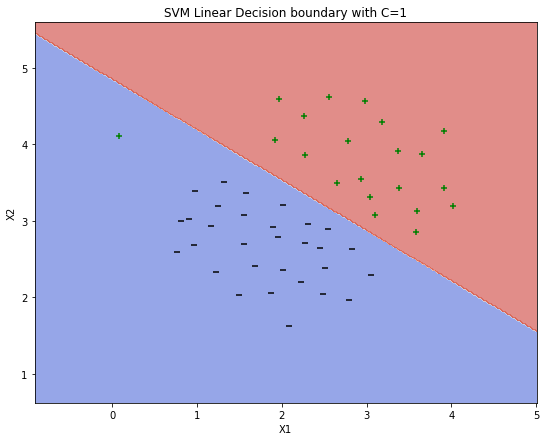

In [7]:
# Running SVM with C = 1
clf, _ = SupportVectorMachine(samples, labels, kernel='linear', C=1, sigma=None)
fig, ax = PlotSVM(clf, samples, labels)
title = ('SVM Linear Decision boundary with C=1')
ax.set_title(title)
ax.set_ylabel('X2')
ax.set_xlabel('X1')
plt.show()

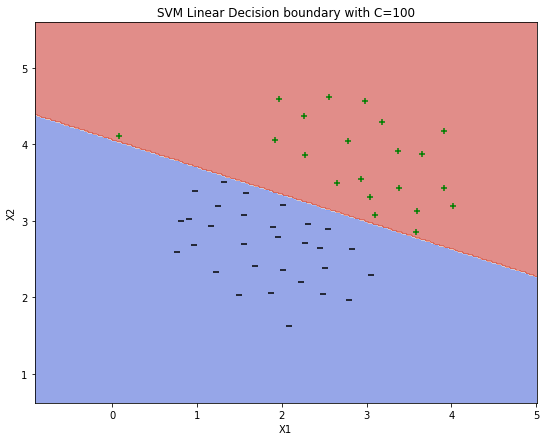

In [8]:
# Running SVM with C = 100
clf, _ = SupportVectorMachine(samples, labels, kernel='linear', C=100, sigma=None)
fig, ax = PlotSVM(clf, samples, labels)
title = ('SVM Linear Decision boundary with C=100')
ax.set_title(title)
ax.set_ylabel('X2')
ax.set_xlabel('X1')
plt.show()

With C = 100, every point is now classified correctly but the decision boundary does not appear to be a natural fit for the data. This is the bias/variance tradeoff in action!

### Example 2: Gaussian Kernel

To find non-linear decision boundaries with the SVM, we can use a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples. The kernel is also parameterized by a bandwidth parameter $\sigma$, which determines how fast the similarity meteric decreases (to 0) as the examples are further apart

**Note:** 
The sklearn library uses a hyperparameter called 'gamma'. According to their documentation found here https://scikit-learn.org/stable/modules/svm.html#svm-kernels, gamma is equivalent to $\frac{1}{2\sigma^2}$

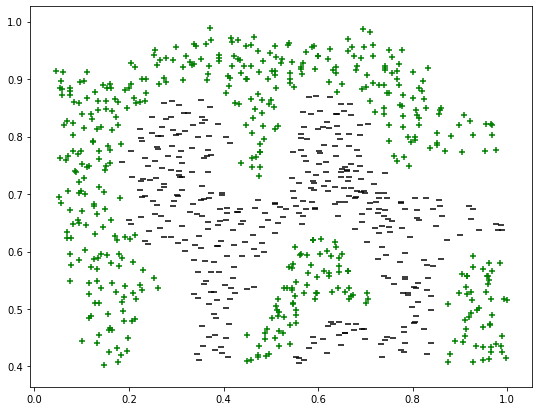

In [9]:
# Load samples
samples2, labels2 = LoadData('samples2.csv', 'labels2.csv')
x1_pos, x2_pos, x1_neg, x2_neg = ParseData(samples2, labels2)
plt.figure(figsize=(9,7))           
plt.scatter(x1_pos, x2_pos, color='green', marker="+")
plt.scatter(x1_neg, x2_neg, color='black', marker="_")
plt.show()

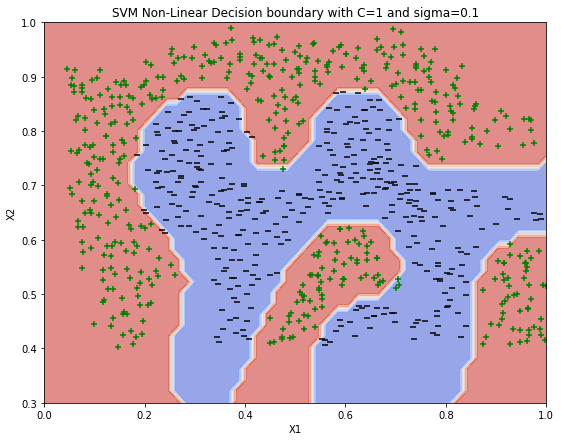

In [10]:
# Running SVM with Gaussian kernel, C=1, sigma 0.1
clf, _ = SupportVectorMachine(samples2, labels2, kernel='rbf', C=1, sigma=0.1)
fig, ax = PlotSVM(clf, samples2, labels2)
plt.xlim(0, 1)
plt.ylim(0.3, 1)
title = ('SVM Non-Linear Decision boundary with C=1 and sigma=0.1')
ax.set_title(title)
ax.set_ylabel('X2')
ax.set_xlabel('X1')
plt.show()

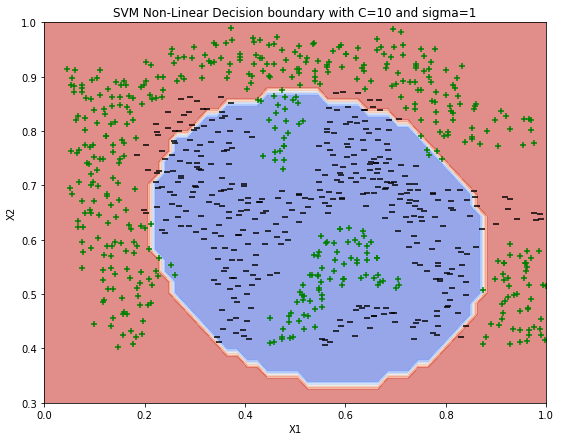

In [11]:
# Running SVM with Gaussian kernel, C=10, sigma 1
clf, _ = SupportVectorMachine(samples2, labels2, kernel='rbf', C=10, sigma=1)
fig, ax = PlotSVM(clf, samples2, labels2)
plt.xlim(0, 1)
plt.ylim(0.3, 1)
title = ('SVM Non-Linear Decision boundary with C=10 and sigma=1')
ax.set_title(title)
ax.set_ylabel('X2')
ax.set_xlabel('X1')
plt.show()

As demonstrated above, the **values of the hyperparameters are critical** to the success of the SVM. If tuned incorreclty, the SVM can perform very poorly! 

### Example 3: Tuning Hyperparameters

Since the hyperparameter values are so crucial to our success, it is imperative we experiment with different combinations of them to find the optimal settings. We can accomplish this by setting aside some of our training data as a validation set and evaluating our error as we iterate. Recall that for classification, one way to define error is as the fraction of the samples that were classified incorrectly. More formally, we can write this as Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$ where `TP` is true positive, `TN` is true negative, `FP` is false positive, and `FN` is false negative


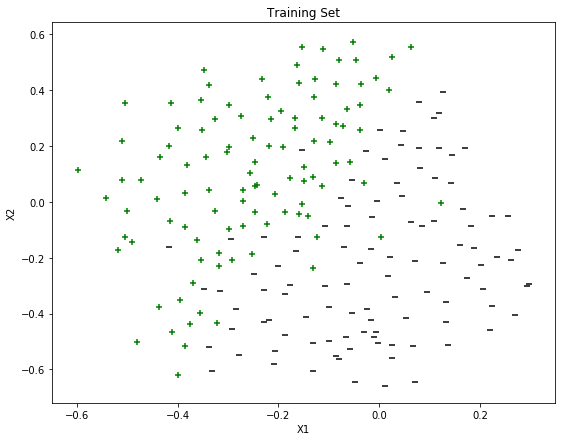

In [12]:
# Load training set
samples3, labels3 = LoadData('samples3.csv', 'labels3.csv')
x1_pos, x2_pos, x1_neg, x2_neg = ParseData(samples3, labels3)
plt.figure(figsize=(9,7))           
plt.scatter(x1_pos, x2_pos, color='green', marker="+")
plt.scatter(x1_neg, x2_neg, color='black', marker="_")
plt.title('Training Set')
plt.ylabel('X2')
plt.xlabel('X1')
plt.show()

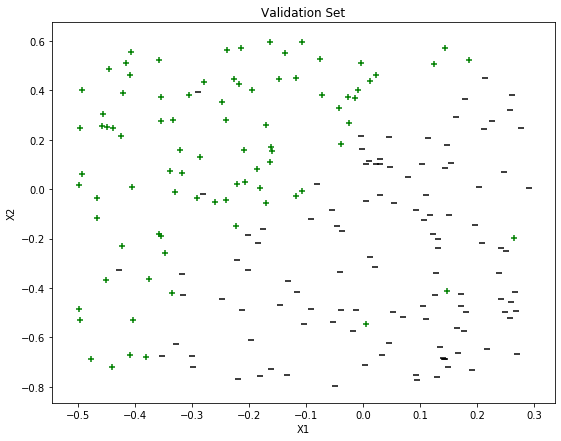

In [13]:
# Load validation set
samples3_val, labels3_val = LoadData('samples3_val.csv', 'labels3_val.csv')
x1_pos, x2_pos, x1_neg, x2_neg = ParseData(samples3_val, labels3_val)
plt.figure(figsize=(9,7))           
plt.scatter(x1_pos, x2_pos, color='green', marker="+")
plt.scatter(x1_neg, x2_neg, color='black', marker="_")
plt.title('Validation Set')
plt.ylabel('X2')
plt.xlabel('X1')
plt.show()

Accuracy array - 64 combinations attempted
[0.435 0.435 0.435 0.435 0.435 0.435 0.435 0.435 0.435 0.435 0.45  0.86
 0.62  0.435 0.435 0.435 0.435 0.435 0.945 0.91  0.825 0.435 0.435 0.435
 0.435 0.755 0.96  0.925 0.89  0.74  0.435 0.435 0.605 0.905 0.965 0.965
 0.925 0.845 0.435 0.435 0.62  0.89  0.965 0.945 0.93  0.89  0.72  0.435
 0.62  0.89  0.94  0.955 0.935 0.92  0.845 0.435 0.62  0.89  0.94  0.96
 0.925 0.925 0.89  0.74 ]
Best accuracy is 0.965 using C = 1.0 and sigma = 0.1


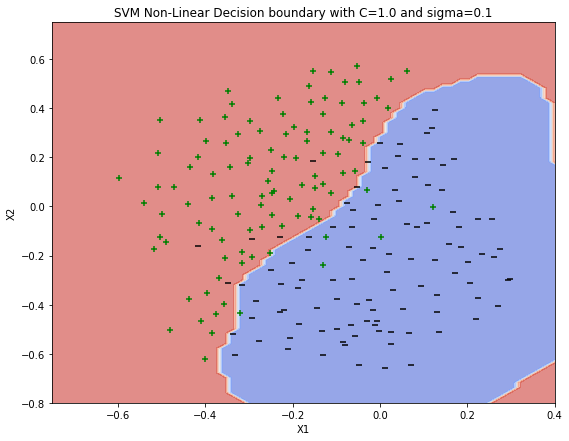

In [14]:
from sklearn.metrics import accuracy_score
import math

# Loop through C and sigma hyperparameters, capturing accuracy against validation set. 
hyper_params = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
accuracy = np.array([])

for C in hyper_params:
    for sigma in hyper_params:
        clf, model = SupportVectorMachine(samples3, labels3, kernel='rbf', C=C, sigma=sigma)
        y = model.predict(samples3_val)
        accuracy = np.append(accuracy, accuracy_score(labels3_val,y))

print("Accuracy array - 64 combinations attempted")
print(accuracy)

index_max = np.argmax(accuracy)
optimal_C = hyper_params[math.floor(index_max/hyper_params.size)]
optimal_sigma = hyper_params[index_max % hyper_params.size]

print("Best accuracy is {} using C = {} and sigma = {}".format(accuracy[index_max], optimal_C, optimal_sigma))

clf, model = SupportVectorMachine(samples3, labels3, kernel='rbf', C=optimal_C, sigma=optimal_sigma)
y = model.predict(samples3_val)
fig, ax = PlotSVM(clf, samples3, labels3)
plt.xlim(-0.75, 0.4)
plt.ylim(-0.8, 0.75)
title = ("SVM Non-Linear Decision boundary with C={} and sigma={}".format(optimal_C, optimal_sigma))
ax.set_title(title)
ax.set_ylabel('X2')
ax.set_xlabel('X1') 
plt.show()

As seen above, we have created a non-linear decision boundary that correctly classifies most of the data. Keep in mind that this is an example and in practice data is almost always greater than two dimensions, rendering a solution space that cannot be graphed. This said, focusing on obtaining a better accuracy on the validation set is a good way to tune the hyperparameters without physically being able to plot the data. 